### This script contains the following:
#### 1. Importing Visualization Libraries and Data
#### 2. Adding relevent columns 
#### 3. Visualizations
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

## 1. Importing Visualization Libraries and Data

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Seting a path
path = r'C:\Users\hp\House Sales in King County, USA'
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_cleaned.csv'), index_col = False)

In [8]:
df.shape

(21612, 20)

In [25]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

## 2. Adding relevent columns 

In [13]:
# Adding a price per square footage column
df['price_per_sqft'] = df['price'] / df['sqft_living']

In [15]:
# Adding 'house_age' column to calculate years since the house was built
df['house_age'] = 2024 - df['yr_built']

In [17]:
# Create 'years_since_renovation' column
df['years_since_renovation'] = np.where(
    df['yr_renovated'] == 0,
    df['house_age'], # If no renovation, use the house age
    2024 - df['yr_renovated'] # If renovated, calculate years since renovation
)

In [19]:
# Creating a subset excluding non-pertinent variables
sub = df[['price','price_per_sqft', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode','sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'house_age', 'years_since_renovation']]

In [21]:
sub.head()

price  price_per_sqft  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  221900.0      188.050847         3       1.00         1180      5650   
1  538000.0      209.338521         3       2.25         2570      7242   
2  180000.0      233.766234         2       1.00          770     10000   
3  604000.0      308.163265         4       3.00         1960      5000   
4  510000.0      303.571429         3       2.00         1680      8080   

   floors  waterfront  view  condition  grade  zipcode  sqft_above  \
0     1.0           0     0          3      7    98178        1180   
1     2.0           0     0          3      7    98125        2170   
2     1.0           0     0          3      6    98028         770   
3     1.0           0     0          5      7    98136        1050   
4     1.0           0     0          3      8    98074        1680   

   sqft_basement  sqft_living15  sqft_lot15  house_age  years_since_renovation  
0              0           1340        5650         69                      69  
1            400           1690        7639         73                      33  
2              0           2720        8062         91                      91  
3            910           1360        5000         59                      59  
4              0           1800        7503         37                      37

## 3. Visualizations

### 3.1 Correlation heatmap

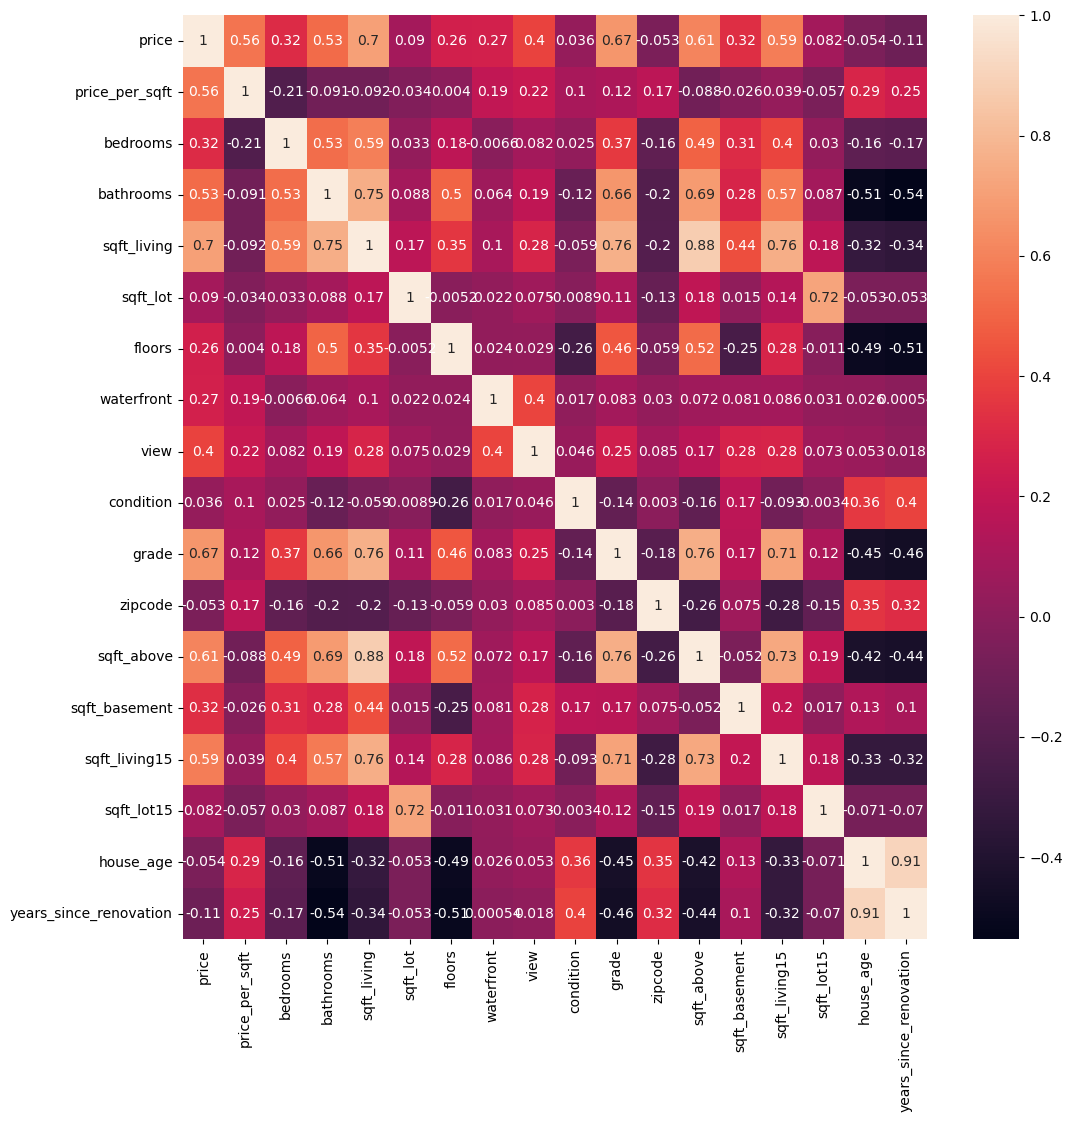

In [45]:
# Create a subplot to define figsize
f,ax = plt.subplots(figsize=(12,12))

# Generate the correlation heatmap using the correlation matrix and display the correlation coefficient in each cell.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

In [39]:
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'correlation_heatmap.png'),bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

Based on the correlation heatmap, here are some key **insights** about the relationships between different variables in the King County house sales dataset:

1. Price and Square Footage:
The price of a house is highly correlated with sqft_living (correlation ≈ 0.7). This suggests that houses with larger interior living spaces tend to have higher prices.
sqft_above (square footage above ground) also shows a strong positive correlation with price (≈ 0.61), indicating that larger above-ground areas are associated with higher house prices.
Additionally, price shows moderate correlation with sqft_living15 (≈ 0.59), indicating that the living space of nearby houses is also somewhat linked to the property’s price, likely reflecting neighborhood trends in property sizes.

2. Price and Quality of Construction/Design:

grade, an indicator of the quality of construction and design, has a strong positive correlation with price (≈ 0.67). This implies that homes built with better materials and design quality generally sell for higher prices.
This positive correlation with price also suggests that houses with higher construction standards are likely more desirable.

3. Price and Number of Rooms:

The number of bathrooms shows a moderate positive correlation with price (≈ 0.53), while bedrooms has a weaker correlation (≈ 0.32). This might indicate that while the total number of bedrooms does have some impact on price, the number of bathrooms has a relatively stronger influence, possibly because additional bathrooms add more convenience and perceived value.

4. Neighborhood (Zip Code):

zipcode has a low negative correlation with price (≈ -0.053), indicating that location by itself (based on zip codes) does not have a strong linear impact on price in this dataset. However, neighborhood desirability could still be indirectly influencing other variables that affect price, such as view or construction grade.

5. Lot Size:

Surprisingly, sqft_lot and sqft_lot15 (lot size and the lot size of 15 neighbors) have very low correlation with price (≈ 0.09 and ≈ 0.08, respectively). This implies that in this dataset, the overall lot size may not be a strong determinant of price, potentially because the value is driven more by the house itself and its interior features rather than by the land.

6. View and Price:

The view variable, which rates the view quality from the property, has a moderate positive correlation with price (≈ 0.4). This suggests that homes with better views generally have higher prices, though it’s not the most influential factor.

### 3.2 Scatterplots

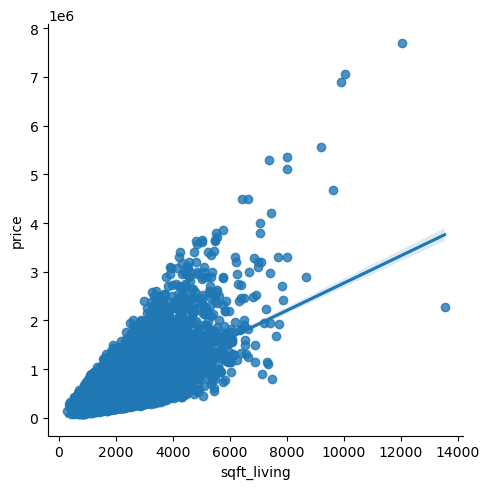

In [51]:
# Create a scotterplot between sqft_living and price
sns.lmplot(x = 'sqft_living', y = 'price', data = df)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplots_price_sqftliving.png'),bbox_inches='tight')

**Insights:** There is a strong correlation between the square footage of living space and house prices. As the square footage increases, home prices generally rise. Notably, once living space exceeds 5,000 square feet, the rate of price increase becomes more pronounced. This trend may reflect the emergence of luxury homes, where additional factors like architectural design and location also play a significant role in determining price

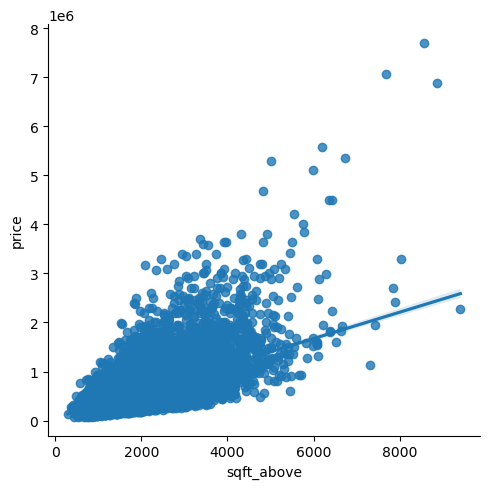

In [54]:
# Create a scotterplot between sqft_above and price
sns.lmplot(x = 'sqft_above', y = 'price', data = df)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplots_price_sqftabove.png'),bbox_inches='tight')

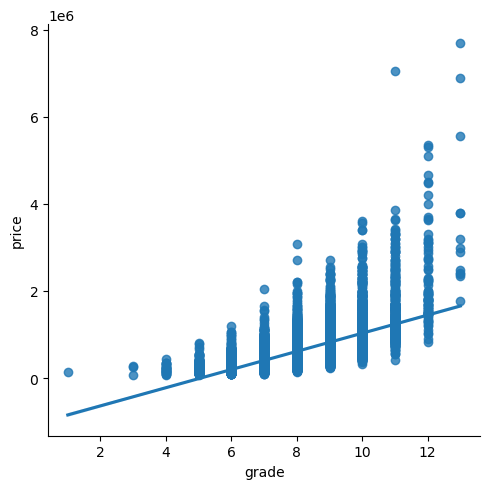

In [56]:
# Create a scotterplot between grade and price
sns.lmplot(x = 'grade', y = 'price', data = df)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplots_price_grade.png'),bbox_inches='tight')

**Insights:** There is a positive correlation between construction grade and price; as the quality of construction improves, house prices tend to rise. However, there is considerable variability in prices across different grades, suggesting that other factors beyond grade may also influence pricing.

### 3.3 Pair Plot

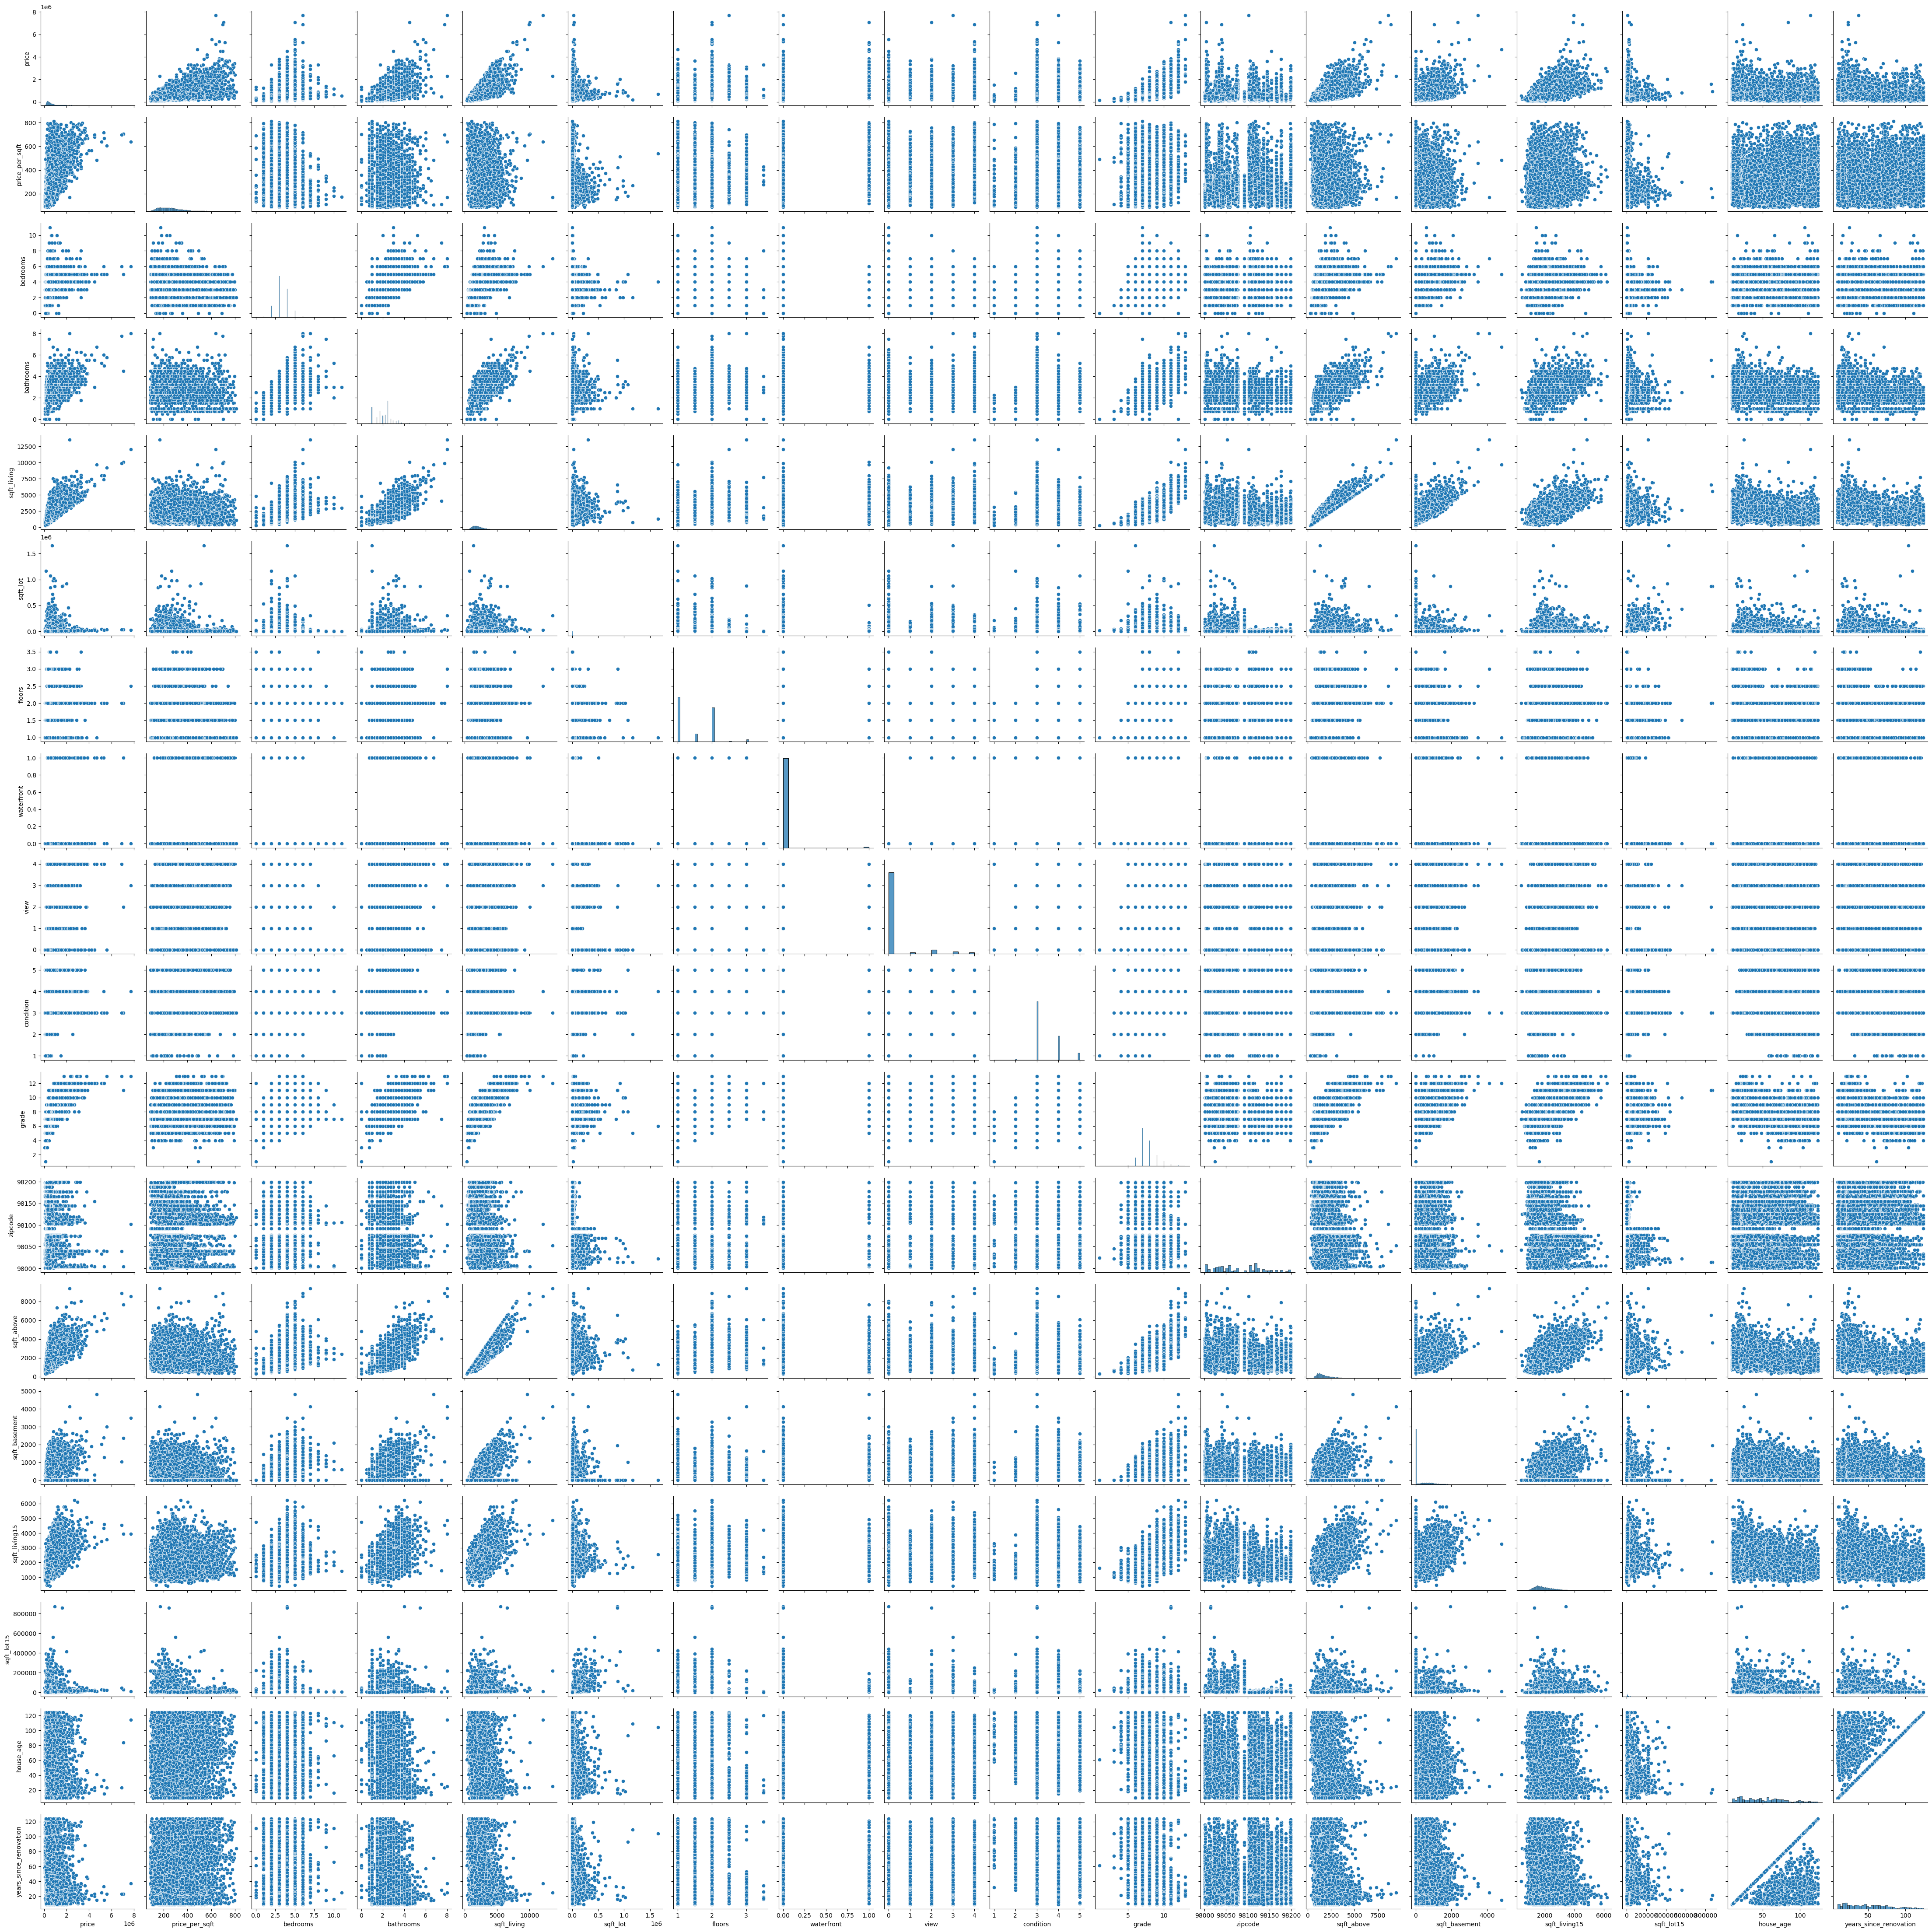

In [60]:
# Create a pairplot of the entire dataframe
sns.pairplot(sub)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pairplot.png'),bbox_inches='tight')

The variables exhibit various linear and non-linear relationships, particularly concerning grade, square footage of living space, and price. Some variables, like square footage of the lot, show greater variability and may be significantly influenced by contextual factors, such as urban versus suburban settings.

**Variables for Further Exploration:**

- *Price vs. Sqft_lot*:
There is a noteworthy trend where smaller lots are associated with higher price points, while larger lots often correlate with lower prices. Investigating whether this pattern is driven by location (urban vs. suburban) or other factors such as proximity to amenities or neighborhood quality would be beneficial.

- *Grade vs. Sqft_lot*:
The relationship between grade and square footage of the lot displays a bell-shaped distribution. Initially, as grade increases, lot size also increases; however, beyond a certain point, lot sizes begin to decrease even as grade continues to rise. This suggests that higher-grade homes may be situated on smaller lots in prime locations, such as city centers. Understanding the reasons behind this trend and its connection to urban versus suburban settings would provide valuable insights.

- *Grade vs. Sqft_living*:
A strong positive correlation exists between grade and living space; as grade improves, living space increases at an accelerating rate, particularly as grade approaches the upper end (closer to 10). This aligns with the expectation that higher-grade homes offer more living space. Investigating whether this relationship holds across different neighborhoods or price ranges could shed light on how home quality relates to size.

- *Floors vs. Sqft_lot* :
An intriguing negative correlation appears between the number of floors and lot size; as lot size decreases, the number of floors tends to increase. This may indicate that homes on smaller lots are often built vertically, a common practice in urban areas with limited space. Exploring the interplay between urban density, lot size, and building height could provide insights into efficient land use in high-density regions.

- *Bathrooms vs. Price*:
The price tends to rise with an increasing number of bathrooms, but there is considerable variability in the data. Homes with 2-3 bathrooms show a wide range of price points, suggesting that other factors, such as size, location, or grade, also play significant roles. Analyzing how bathroom count interacts with other features to influence price could reveal the point at which additional bathrooms have diminishing returns on price.

- *Bedrooms vs. Price*:
Similar to bathrooms, price generally increases with the number of bedrooms up to a point. However, after five bedrooms, prices begin to decline. This suggests that other factors contribute to house prices, and further investigation is warranted to understand why an increase in bedrooms may lead to lower prices beyond a certain threshold.



### 3.4 Categorical Plots

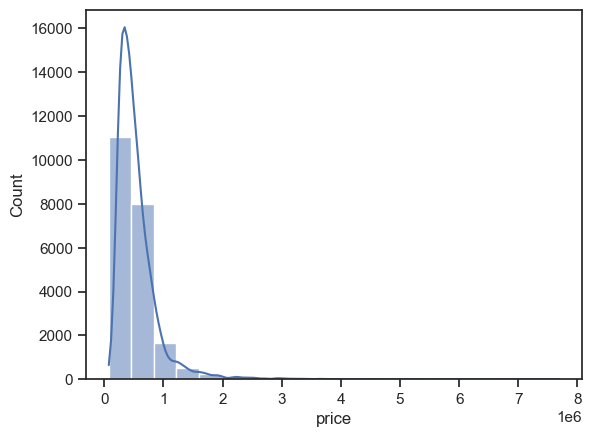

In [76]:
sns.histplot(df['price'], bins = 20, kde = True)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price.png'),bbox_inches='tight')

In [66]:
# Calculate mean and standard deviation of price for creating price categories.
mean_price = df['price'].mean()
std_price = df['price'].std()

# Define price categories:

df.loc[df['price'] < mean_price - std_price, 'price_category'] =  'Low price'
df.loc[(df['price'] >= mean_price - std_price) & (df['price'] <= mean_price + std_price), 'price_category'] = 'Middle price'
df.loc[df['price'] >= mean_price + std_price, 'price_category'] = 'High price'

In [68]:
# Check the distribution
df['price_category'].value_counts()

price_category
Middle price    19215
High price       2007
Low price         390
Name: count, dtype: int64

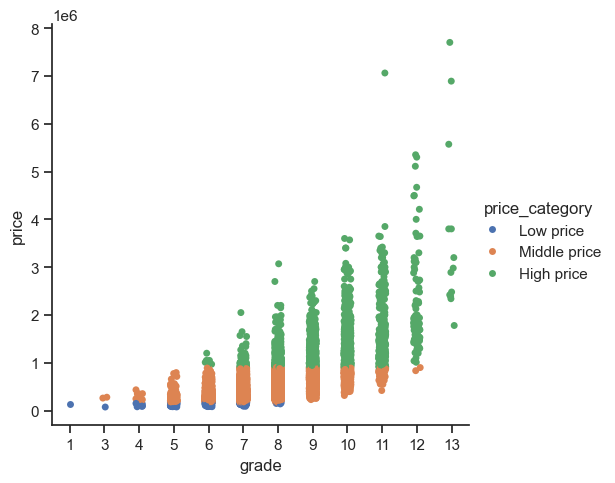

In [72]:
# Create the categorical plot
sns.set(style='ticks')
g = sns.catplot(x='grade', y= 'price', hue='price_category', data=df)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'categoricalplotsprice.png'),bbox_inches='tight')

## 4. Export data 

In [82]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_for_visualizations.csv'), index=False)